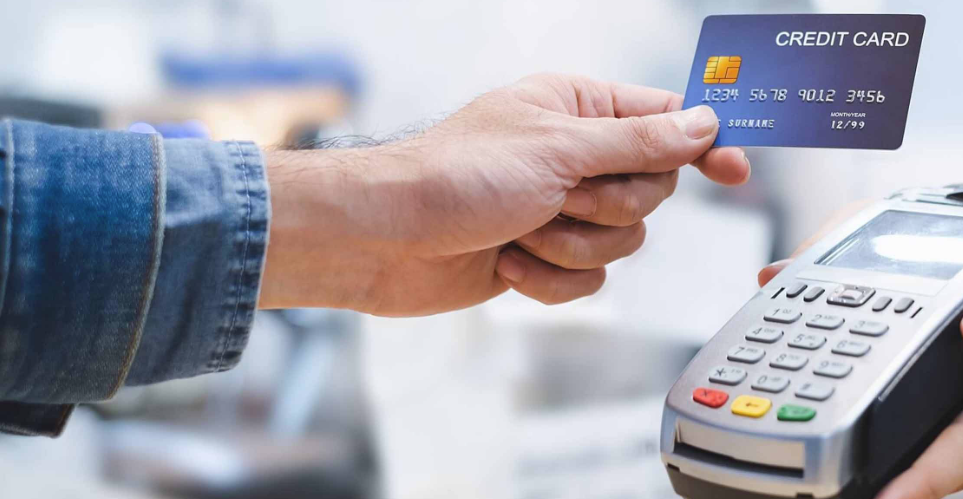

# **Credit Card Fraud Detection using CNN**

It is crucial for credit card companies to accurately detect fraudulent transactions to protect their customers from unauthorized charges and financial loss. By identifying and preventing fraudulent activity, companies not only safeguard customer trust and financial security but also reduce the potential costs associated with fraud, including reimbursements and legal complications. This proactive approach helps maintain the integrity of the payment system and enhances customer confidence in using their credit cards for everyday transactions.

**About the Dataset**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## **Data Preprocessing**

Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lets import the data from creditcard.csv in a dataframe.

In [2]:
df  = pd.read_csv('creditcard.csv')

Lets check basic information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Lets check the shape of the dataset.

In [6]:
df.shape

(284807, 31)

Let's explore the descriptive statistics of the dataset to understand key metrics like the mean, standard deviation, and range, which will help us identify patterns, variability, and potential outliers for better data preparation and analysis.

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Lets check the first 5 rows of our dataset.

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Lets check if there are null values.

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Lets observe the unique counts of our Class column.

In [11]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Now, let's create two subsets of the dataset: one for fraudulent transactions and another for non-fraudulent transactions.

In [14]:
df_fraud = df[df['Class']==1]
df_non_fraud = df[df['Class']==0]

Lets check the shape of each dataframes.

In [15]:
df_fraud.shape

(492, 31)

In [16]:
df_non_fraud.shape

(284315, 31)

Let's perform sampling to select 492 samples from the df_non_fraud dataset.

In [18]:
df_non_fraud_sampled = df_non_fraud.sample(n=492)
df_non_fraud_sampled.shape

(492, 31)

Now both fraud and non fraud dataframes have the same number of rows. Lets merge both dataset.

In [20]:
df_merge = pd.concat([df_fraud, df_non_fraud_sampled], ignore_index=True)
df_merge

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,141531.0,0.563033,0.330418,-0.380042,0.832169,0.462413,-0.150599,1.037626,-0.451356,-0.348609,...,0.384020,1.270374,0.203988,0.556600,-1.411883,0.960105,0.071459,0.070496,102.00,0
980,55253.0,-1.124053,1.250043,1.211319,0.917893,0.115931,0.218229,0.325283,0.727859,-1.145195,...,-0.348168,-1.240986,0.069250,-0.412440,0.033054,-0.601720,0.193190,0.047329,34.40,0
981,130933.0,1.758791,-1.001785,-1.880136,-0.487925,1.663900,3.841383,-1.049815,0.986536,0.857973,...,0.258254,0.509389,0.115045,0.745059,-0.291714,0.364595,-0.015660,-0.029960,124.00,0
982,60103.0,0.590314,-1.990821,0.855194,-0.102177,-2.179289,-0.558950,-0.643404,-0.103971,-0.136063,...,0.560269,0.806373,-0.400322,0.778539,0.265391,-0.106893,-0.023521,0.095493,395.00,0


Lets check observation of each class.

In [21]:
df_merge['Class'].value_counts()

,count
Class,
1,492
0,492


Now, let's prepare our dataset for training by selecting the relevant features and labels.

In [22]:
x = df_merge.drop(labels=['Class'], axis=1)
y = df_merge['Class']
x.shape, y.shape

((984, 30), (984,))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((787, 30), (197, 30))

Let's apply feature scaling to the selected features to ensure they are on a similar scale.

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_train.shape, x_test.shape

((787, 30), (197, 30))

Let's reshape the dataset for better analysis and processing.

In [30]:
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

## **Model Development**

Lets create a Convolutional Neural Network (CNN) model consists of 13 layers. Here are the description of the layers.
* 2 Conv1D layers for feature extraction.
* 2 Batch Normalization layers for stabilizing training.
* 2 Max Pooling layers for downsampling.
* 3 Dropout layers to prevent overfitting.
* 1 Flatten layer to convert 2D outputs to 1D.
* 2 Dense layers, including one output layer with a sigmoid activation function for binary classification.

In [31]:
model = tf.keras.models.Sequential()  # defining an object

model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)))  # first CNN layer
model.add(tf.keras.layers.BatchNormalization())  # batch normalization
model.add(tf.keras.layers.MaxPool1D(pool_size=2))  # maxpool layer
model.add(tf.keras.layers.Dropout(0.2))  # dropout layer

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))  # second CNN layer
model.add(tf.keras.layers.BatchNormalization())  # batch normalization
model.add(tf.keras.layers.MaxPool1D(pool_size=2))  # maxpool layer
model.add(tf.keras.layers.Dropout(0.3))  # dropout layer
model.add(tf.keras.layers.Flatten())  # flatten layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))  # first dense layer
model.add(tf.keras.layers.Dropout(0.3))  # dropout layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # output layer
model.summary()  # display the model summary
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)  # define the optimizer

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  # compile the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 15, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

## **Model Training**

Now lets train our CNN model.

In [36]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))
y_pred = (model.predict(x_test) > 0.5).astype(int)
y_pred[12], y_test[12]

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9400 - loss: 0.1721 - val_accuracy: 0.9594 - val_loss: 0.1174
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9469 - loss: 0.1712 - val_accuracy: 0.9594 - val_loss: 0.1173
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9249 - loss: 0.1789 - val_accuracy: 0.9594 - val_loss: 0.1166
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9392 - loss: 0.1621 - val_accuracy: 0.9594 - val_loss: 0.1160
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9451 - loss: 0.1413 - val_accuracy: 0.9594 - val_loss: 0.1159
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9483 - loss: 0.1451 - val_accuracy: 0.9594 - val_loss: 0.1155
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9530 - loss: 0.1165 - val_accuracy: 0.9594 - val_loss: 0.1156
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9437 - loss: 0.1521 - val_accuracy: 0.9543 - val_lo

(array([1]), 1)

## **Model Evaluation**

Now lets generate the confusion metrics of our model.

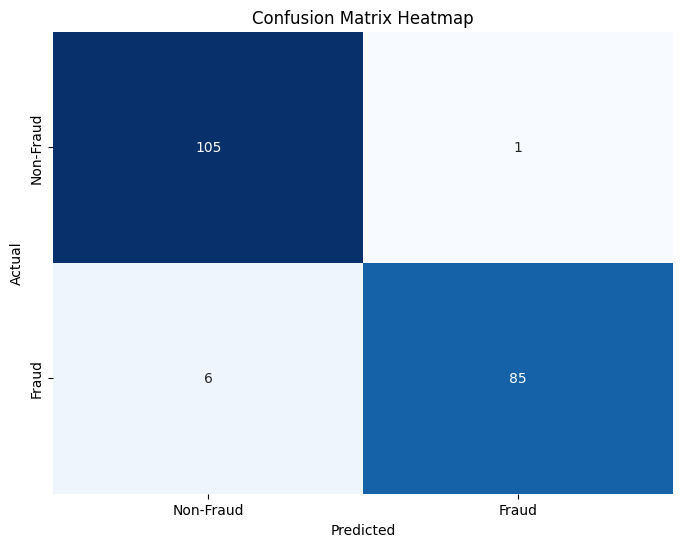

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.99      0.93      0.96        91

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



Lets check the learning curve of our model.

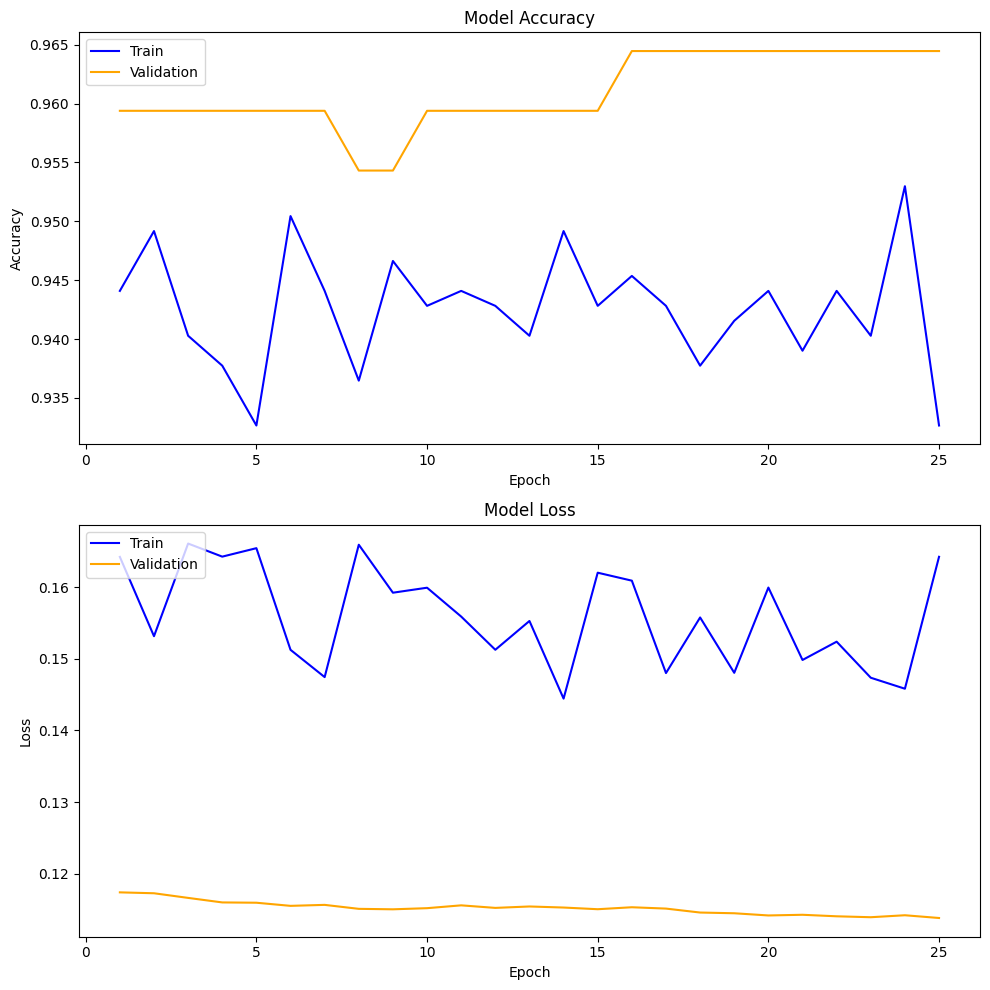

In [41]:
def learning_curve(history, epoch):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    epoch_range = range(1, epoch + 1)
    axs[0].plot(epoch_range, history.history['accuracy'], label='Train', color='blue')
    axs[0].plot(epoch_range, history.history['val_accuracy'], label='Validation', color='orange')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='upper left')

    axs[1].plot(epoch_range, history.history['loss'], label='Train', color='blue')
    axs[1].plot(epoch_range, history.history['val_loss'], label='Validation', color='orange')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

learning_curve(history, 25)